In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# exploring the dataset
students = pd.read_csv("/home/mittesh/Orinson_technologies/ML-student-performance-prediction/data/StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
# displaying the general information of the dataset with informations like the column names their data types and the count of non-null values for every column
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# checking if there is any column which contains null values
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# getting the number of categories present in each categorical variable
students.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [7]:
#finding out the various categories present in the different categorical variable
print("Categories in 'gender' variable: ",end=" ")
print(students['gender'].unique())
print("Categories in 'race/ethnicity' variable: ",end=" ")
print(students['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable: ",end=" ")
print(students['parental level of education'].unique())
print("Categories in 'lunch' variable: ",end=" ")
print(students['lunch'].unique())
print("Categories in 'test preparation course' variable: ",end=" ")
print(students['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [8]:
#displaying information about the quantitive/numerical columns, information like count, mean, standard deviation, minimum value, maximum value and the quartiles are displayed 
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# model started

#Total score = math score + reading score + writing score
students['Total Score']=students['math score']+students['reading score']+students['writing score']

In [10]:
# criteria for getting a passing grade
def result(TS,MS,WS,RS ):
    if(TS>120 and MS>40 and WS>40 and RS>40):
        return 'P'
    else:
        return 'F'
    
students['Pass/Fail'] = students.apply(lambda x: result(x['Total Score'],x['math score'],x['writing score'],x['reading score']),axis = 1 )

students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P
1,female,group C,some college,standard,completed,69,90,88,247,P
2,female,group B,master's degree,standard,none,90,95,93,278,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,P
4,male,group C,some college,standard,none,76,78,75,229,P


In [11]:
# displaying the number of students passed and failed according to the passing criteria
students['Pass/Fail'].value_counts()

Pass/Fail
P    939
F     61
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage of students Passed/Failed')

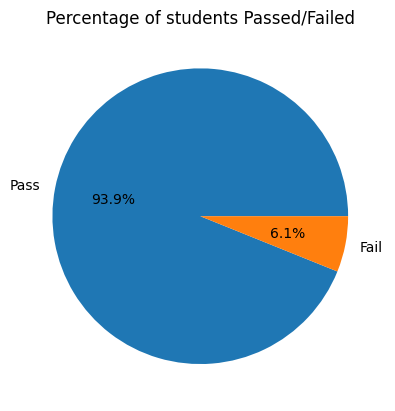

In [12]:
# visualizing the performace of the students
plt.pie(students['Pass/Fail'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Percentage of students Passed/Failed')

In [13]:
# displaying the number of male and female students in the class
students['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [14]:
# finding out the percentage of female students passed
print("Percentage of female students passed: {0:.2f}%"
    .format((students[(students['gender']=='female') & (students['Pass/Fail']=='P')].shape[0]/students[students['gender']=='female'].shape[0])*100))

# finding out the percentage of male students passed
print("Percentage of male students passed: {0:.2f}%"
    .format((students[(students['gender']=='male') & (students['Pass/Fail']=='P')].shape[0]/students[students['gender']=='male'].shape[0])*100))

Percentage of female students passed: 92.86%
Percentage of male students passed: 95.02%


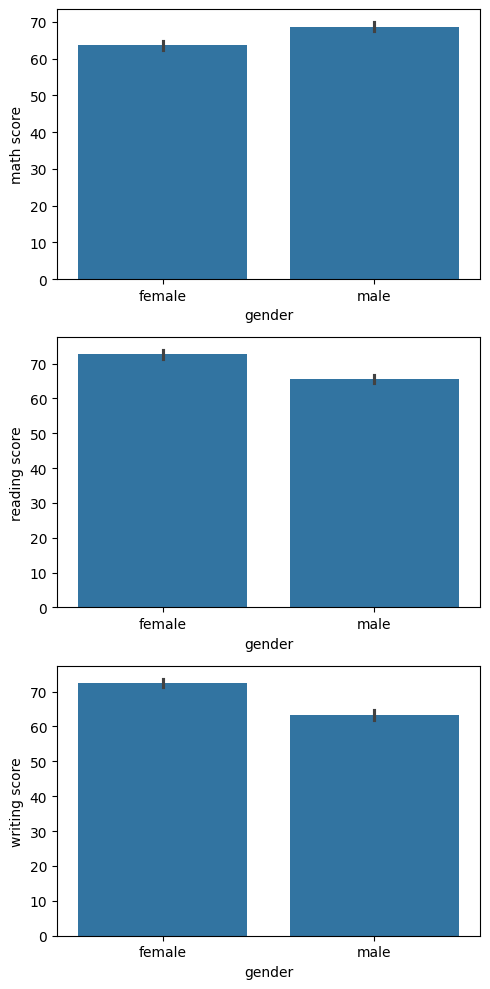

In [15]:
# analysing the performance of the students in the three different subjects and their variation across the gender

fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.barplot(x=students['gender'],y=students['math score'], ax=ax[0], linewidth=2.5)
sns.barplot(x=students['gender'],y=students['reading score'], ax=ax[1],linewidth=2.5)
sns.barplot(x=students['gender'],y=students['writing score'], ax=ax[2],linewidth=2.5)
plt.tight_layout()

In [16]:
# finding out the impact of the educational background of the parents on the students performance >>

#number of students having parents with various edication level
students['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

The number of students passed across the different parental levels of education: 
parental level of education
some college          216
associate's degree    212
high school           178
some high school      162
bachelor's degree     114
master's degree        57
Name: count, dtype: int64


(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250')])

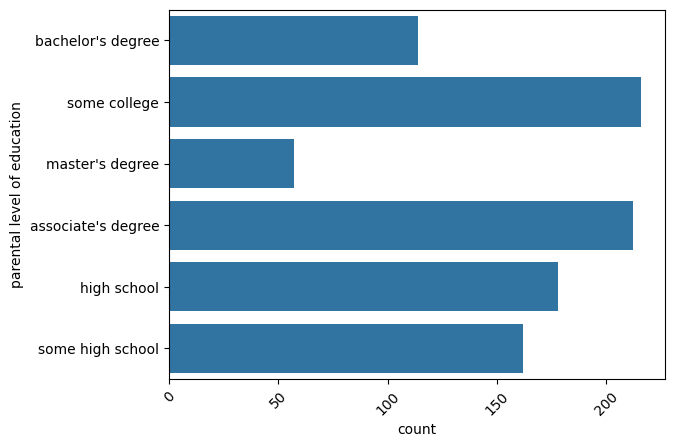

In [17]:
#number of students passed across the parental levels of education 
print("The number of students passed across the different parental levels of education: ")
print(students['parental level of education'].loc[students['Pass/Fail']=='P'].value_counts())
sns.countplot(students['parental level of education'].loc[students['Pass/Fail']=='P'])
plt.xticks(rotation = 45)

In [18]:
# finding out the percentage of students passed with the parental level of education as 'some college'
print("Percentage of students passed with the parental level of education as 'some college': {0:.2f}%"
    .format((students[(students['parental level of education']=='some college') & (students['Pass/Fail']=='P')].shape[0]/students[students['parental level of education']=='some college'].shape[0])*100))

# finding out the percentage of students passed with the parental level of education as 'associate's degree'
print("Percentage of students passed with the parental level of education as 'associate's degree': {0:.2f}%"
    .format((students[(students['parental level of education']=="associate's degree") & (students['Pass/Fail']=='P')].shape[0]/students[students['parental level of education']=="associate's degree"].shape[0])*100))

# finding out the percentage of students passed with the parental level of education as 'high school'
print("Percentage of students passed with the parental level of education as 'high school': {0:.2f}%"
    .format((students[(students['parental level of education']=="high school") & (students['Pass/Fail']=='P')].shape[0]/students[students['parental level of education']=="high school"].shape[0])*100))

# finding out the percentage of students passed with the parental level of education as 'some high school'
print("Percentage of students passed with the parental level of education as 'some high school': {0:.2f}%"
    .format((students[(students['parental level of education']=="some high school") & (students['Pass/Fail']=='P')].shape[0]/students[students['parental level of education']=="some high school"].shape[0])*100))

# finding out the percentage of students passed with the parental level of education as 'bachelor's degree'
print("Percentage of students passed with the parental level of education as 'bachelor's degree': {0:.2f}%"
    .format((students[(students['parental level of education']=="bachelor's degree") & (students['Pass/Fail']=='P')].shape[0]/students[students['parental level of education']=="bachelor's degree"].shape[0])*100))

# finding out the percentage of students passed with the parental level of education as 'master's degree'
print("Percentage of students passed with the parental level of education as 'master's degree': {0:.2f}%"
    .format((students[(students['parental level of education']=="master's degree") & (students['Pass/Fail']=='P')].shape[0]/students[students['parental level of education']=="master's degree"].shape[0])*100))

Percentage of students passed with the parental level of education as 'some college': 95.58%
Percentage of students passed with the parental level of education as 'associate's degree': 95.50%
Percentage of students passed with the parental level of education as 'high school': 90.82%
Percentage of students passed with the parental level of education as 'some high school': 90.50%
Percentage of students passed with the parental level of education as 'bachelor's degree': 96.61%
Percentage of students passed with the parental level of education as 'master's degree': 96.61%


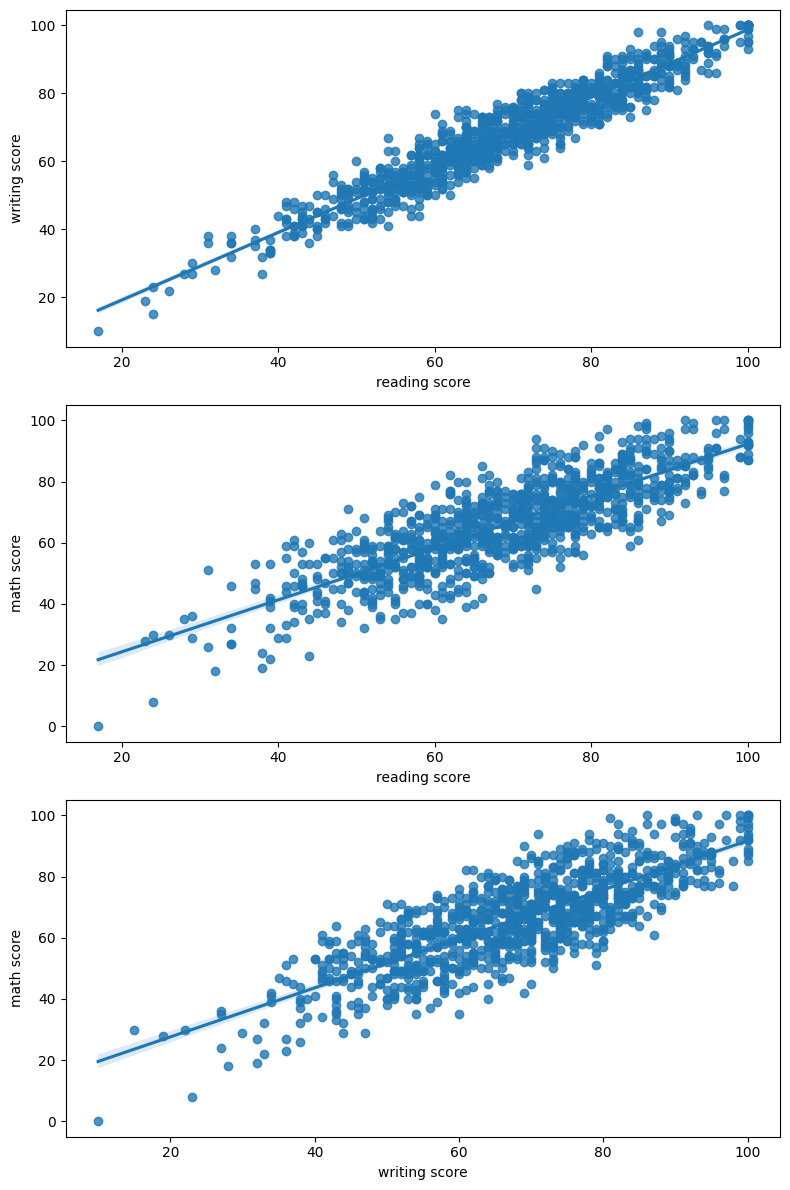

In [19]:
# finding out whether there is any correlation between how the students performed in the various courses
fig, ax = plt.subplots(3,1, figsize=(8,12))
sns.regplot(x=students['reading score'],y=students['writing score'],ax = ax[0])
sns.regplot(x=students['reading score'],y=students['math score'],ax = ax[1])
sns.regplot(x=students['writing score'],y=students['math score'],ax=ax[2])
plt.tight_layout()

In [20]:
#training a model to be able to predict the 'Pass/Fail' status of students provided with the features impacting the score of the student

X=students[['gender','parental level of education','test preparation course']]
X.head()

,gender,parental level of education,test preparation course
0,female,bachelor's degree,none
1,female,some college,completed
2,female,master's degree,none
3,male,associate's degree,none
4,male,some college,none


In [21]:
# As we know to train a model with categorical variables, they must be first converted into a form which can be utilized for the model fitting purpose. We have used the One Hot Encoding technique to transform the categorical variables
X_category = students[['gender','parental level of education','test preparation course']]\

# Applying one-hot encoding to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_OH = pd.DataFrame(OH_encoder.fit_transform(X_category))
X_OH.index = X.index #One-hot encoding removes the index so it's necessary to put them back
X_OH.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [22]:
#collecting the total score of the students from the dataset
y=students['Pass/Fail']
y.head()

0    P
1    P
2    P
3    P
4    P
Name: Pass/Fail, dtype: object

In [23]:
lb=LabelEncoder()
y=lb.fit_transform(y)

# Dividing data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X_OH, y, train_size=0.8, test_size=0.2,random_state=0)

In [24]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
# model predicting
preds=model.predict(X_valid) # predictions made by the model

#model predicting
preds=model.predict(X_valid)#predictions made by the model

preds

array([0.93764324, 0.93950707, 1.        , 0.91493546, 0.951917  ,
       0.96769651, 0.93764324, 0.93950707, 1.        , 0.94985374,
       0.951917  , 0.94845578, 1.        , 0.93950707, 1.        ,
       0.8575474 , 0.94985374, 1.        , 0.88865456, 1.        ,
       0.951917  , 0.94845578, 0.94845578, 0.94915862, 0.94915862,
       0.93950707, 0.93950707, 1.        , 0.8575474 , 1.        ,
       0.8575474 , 1.        , 0.94845578, 0.8575474 , 0.95015632,
       0.93950707, 0.88865456, 1.        , 1.        , 0.8575474 ,
       0.91493546, 0.94985374, 0.94985374, 1.        , 0.951917  ,
       1.        , 0.84472943, 0.951917  , 1.        , 0.93764324,
       0.93950707, 0.93950707, 0.84472943, 0.94985374, 1.        ,
       0.93764324, 0.94845578, 0.94915862, 0.96769651, 0.94845578,
       0.94915862, 0.95015632, 1.        , 0.93950707, 0.96769651,
       0.96769651, 0.94985374, 0.84472943, 0.92337411, 1.        ,
       0.93950707, 0.93950707, 0.94915862, 0.95015632, 0.93950

In [26]:
y_valid

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [27]:
# Calculating the Mean Absolute Error value
mae(y_valid,preds)

np.float64(0.1176057678677962)

In [28]:
# For better evaluation, we will perform cross validation and will try to obtain the Mean Absolute Error(MAE) value
scores = -1 * cross_val_score(model, X_OH, y,cv=5,scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [0.1177296  0.11100248 0.11297159 0.11034176 0.11070567]


In [29]:
import joblib

# Assuming 'model' is your trained machine learning model
joblib.dump(model, 'final_model.pkl')
print("Model saved as final_model.pkl")


Model saved as final_model.pkl
